# Using Pandas
- `pandas` is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool
- `pandas` is built on top of `numpy` and therefore quite often used together with `numpy`


In [3]:
import numpy as np
import pandas as pd

# Check your Pandas version
Syntax:
```
print(pd.__version__)
```

In [229]:
print(pd.__version__)

1.1.5


# Some numpy handy functions

**Createing array**

instead of typing `l = ['A', 'B', 'C', 'D', 'E']`
```
l = list('ABCDE')
l = 'A B C D E'.split()
```

**Generates a range of dates**:
```
dates = pd.date_range('20210101', periods=7) 
type(dates) # returns pandas.core.indexes.datetimes.DatetimeIndex
```

In [235]:
dates = pd.date_range('20210101', periods=7) 

In [65]:
list('ABCDE')

['A', 'B', 'C', 'D', 'E']

In [66]:
'A B C D E'.split()

['A', 'B', 'C', 'D', 'E']

In [236]:
dates

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07'],
              dtype='datetime64[ns]', freq='D')

In [64]:
type(dates)

pandas.core.indexes.datetimes.DatetimeIndex

# Pandas `DataFrame`
A DataFrame is a two dimensional data structure

**To declare a dataframe**:
```
df = pd.DataFrame({
    "Name": ["Andy", "Ben", "Cathy", "Debra"],
    "Age": [20, 22, 23, 22],
    "Sex": ["male", "male", "female", "female"],
    "Year": [1, 3, 4, 3]
})
```

**Check the type**
```
print(type(df)) # it returns pandas.core.frame.DataFrame

```
**In real applications**
- DataFrame are seldom declared by this approach.
- Instead, they are imported from external sources
- E.g.: csv, excel, json

In [14]:
df = pd.DataFrame({
    "Name": ["Andy", "Ben", "Cathy", "Debra"],
    "Age": [20, 22, 23, 22],
    "Sex": ["male", "male", "female", "female"],
    "Year": [1, 3, 4, 3]
})

In [15]:
df

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
2,Cathy,23,female,4
3,Debra,22,female,3


In [48]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


# DataFrame information
```
df.shape # return the dimension
df.shape[0] # return the number of row
df.info()
df.describe()
```

# Retrieving a column
Use a `[]` (square bracket) with a column index name (in string) to indicate which column you want to retrieve

Example
```
df['Name']
name = df['Name']
print(type(name)) # returns pandas.core.series.Series
```

In [35]:
df['Name']
name = df['Name']
print(type(name))

<class 'pandas.core.series.Series'>


# Retrieving multiple columns
Use a `[]` (square bracket) with a column index name (in string) to indicate which column you want to retrieve

**Example**
```
columns = ['Name', 'Year'] # declare the columns you want in a list
df[columns] # pass the column list as paramenter to the dataframe
df[['Name', 'Year']] # Or simply put the list of column names directly, Note is double squared
name_and_year = df[['Name', 'Year']]
print(type(name_and_year)) # Returns pandas.core.frame.DataFrame
```
**Below is a mistake**
```
name_and_year = df['Name', 'Year']
```

In [62]:
columns = ['Name', 'Year']
df[columns]

,Name,Year
0,Andy,1
1,Ben,3
2,Cathy,4


In [53]:
print(type(name_and_year))

<class 'pandas.core.frame.DataFrame'>


# Locating Row
Pandas use the loc attribute to return one or more specified row(s)
Example:
```
df.loc[0]
df.loc[1]

type(df.loc[0]) # returns pandas.core.series.Series
```

In [70]:
df

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
2,Cathy,23,female,4


In [13]:
df.loc[0]

NameError: name 'df' is not defined

In [72]:
type(df.loc[1])|

pandas.core.series.Series

# Locating Multiple Rows
Provide a list of row number: `[0, 2]`

Example:
```
df.loc[[0, 2]]
```
**Mistake**:
```
df.loc[0, 2]
```


In [18]:
df.loc[[0,2,3]]

,Name,Age,Sex,Year
0,Andy,20,male,1
2,Cathy,23,female,4
3,Debra,22,female,3


## Retrieving a range of row
Provide the starting row number and ending row number. `:` separated

Example:
```
df.loc[0:1]
df.loc[:2] # from position 0 to 2
df.loc[2:] # from position 2 to the end
```
Short hand:
```
df[0:1]
df[:2] # from position 0 to 1. End position exclusive.
df[2:] # from position 2 to the end
```


In [38]:
df[1:]

,Name,Age,Sex,Year
1,Ben,22,male,3
2,Cathy,23,female,4
3,Debra,22,female,3


In [37]:
df.loc[1:]

,Name,Age,Sex,Year
1,Ben,22,male,3
2,Cathy,23,female,4
3,Debra,22,female,3


In [22]:
df

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
2,Cathy,23,female,4
3,Debra,22,female,3


# Filtering Rows
- Perform a comparison operation on a certain column. 
- It scans through each row
- It returns `True` or `False` for comparison operation on that row

Example:
```
filter = df['Age']<23
df[filter]
```
or in one line
```
df[df['Age']<23]
```


In [40]:
df

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
2,Cathy,23,female,4
3,Debra,22,female,3


In [29]:
filter = df['Age']<23
filter

0     True
1     True
2    False
3     True
Name: Age, dtype: bool

In [30]:
type(filter)

pandas.core.series.Series

In [31]:
df[filter]

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
3,Debra,22,female,3


# Filtering Rows with multiple filters
Example:
```
filter = df['Age']<23
filter2 = df['Year']==3
df[filter & filter2]
df[filter | filter2]
```
Concatenate the filter result for display
```
pd.concat([filter, filter2, (filter & filter2)], axis=1)
pd.concat([filter, filter2, (filter | filter2)], axis=1)

```

In [48]:
filter = df['Age']<23
filter

0     True
1     True
2    False
3     True
Name: Age, dtype: bool

In [49]:
filter2 = df['Year']==3
filter2

0    False
1     True
2    False
3     True
Name: Year, dtype: bool

In [57]:
pd.concat([filter, filter2, (filter | filter2)], axis=1)

,Age,Year,0
0,True,False,True
1,True,True,True
2,False,False,False
3,True,True,True


In [56]:
df[filter | filter2]

,Name,Age,Sex,Year
0,Andy,20,male,1
1,Ben,22,male,3
3,Debra,22,female,3


# Restricting rows and columns at the same time
You are apply both row filtering and columns retricting
Example:
```
df[df['Year']==3][['Name', 'Year']]
```

In [60]:
df[df['Year']==3][['Name', 'Year']]

,Name,Year
1,Ben,3
3,Debra,3


# Use Pandas to retrieve HTML content
Example:
```
url = 'http://www.multpl.com/s-p-500-dividend-yield/table?f=m'
raw_html_tbl = pd.read_html(url)
type(raw_html_tbl)
len(raw_html_tbl)
raw_html_tbl[0]
type(raw_html_tbl[0])
```

In [67]:
url = 'http://www.multpl.com/s-p-500-dividend-yield/table?f=m'

In [70]:
raw_html_tbl = pd.read_html(url)

In [91]:
type(raw_html_tbl)

list

In [90]:
len(raw_html_tbl)

1

In [88]:
type(raw_html_tbl[0])

pandas.core.frame.DataFrame

In [89]:
raw_html_tbl[0]

,Date,Yield Value
0,"Jan 4, 2021",1.60% estimate
1,"Dec 31, 2020",1.60% estimate
2,"Nov 30, 2020",1.66% estimate
3,"Oct 31, 2020",1.72% estimate
4,"Sep 30, 2020",1.75%
...,...,...
1796,"May 31, 1871",5.35%
1797,"Apr 30, 1871",5.49%
1798,"Mar 31, 1871",5.64%
1799,"Feb 28, 1871",5.78%


# `pd.read_html()` doesn't always work
- There are two many broken HTML Codes
- Some HTML are generated by JavaScript on the fly
Example: The following scraping won't work
```
url2 = 'https://stock360.hkej.com/marketWatch/Top20'
raw_html_tbl2 = pd.read_html(url2)
raw_html_tbl2
```

In [92]:
url2 = 'https://stock360.hkej.com/marketWatch/Top20'


# Another Example or web scraping
Retrieving currency table from Yahoo Finance
```
url3 = 'https://hk.finance.yahoo.com/currencies'
raw_html_tbl3 = pd.read_html(url3)
raw_html_tbl3[0]
```

In [93]:
url3 = 'https://hk.finance.yahoo.com/currencies'
raw_html_tbl3 = pd.read_html(url3)
raw_html_tbl3[0]

,代號,名稱,收市價,變化,% 變化,52 週範圍,日圖表
0,HKD=X,美元/港元,7.7535,0.0011,+0.01%,NaN,NaN
1,HKDCNY=X,港元/人民幣,0.8327,-0.0087,-1.03%,NaN,NaN
2,EURHKD=X,歐元/港元,9.5016,0.0322,+0.34%,NaN,NaN
3,GBPHKD=X,英鎊/港元,10.5030,-0.0950,-0.90%,NaN,NaN
4,JPYHKD=X,日圓/港元,0.0750,0.0001,+0.13%,NaN,NaN
5,AUDHKD=X,澳元/港元,5.9205,-0.0431,-0.72%,NaN,NaN
6,NZDHKD=X,紐元/港元,5.5532,-0.0143,-0.26%,NaN,NaN
7,CADHKD=X,加元/港元,6.0658,-0.0232,-0.38%,NaN,NaN
8,HKDTWD=X,港元/新台幣,3.6264,-0.0025,-0.07%,NaN,NaN
9,HKDTHB=X,港元/泰銖,3.8586,-0.0134,-0.35%,NaN,NaN


# Reading CSV
Example:
```
df = pd.read_csv('./data/Salaries.csv')
df.head() # return the first 5 rows
df.tail() # return the last 5 rows
df.head(10)
df.tail(10)
df.info() # the table meta data
df.describe() # basic statistic information
```
**Handling Empty Values**:
- The `info()` method also tells us how many Non-Null values there are present in each column
- Empty values, or Null values, can be bad when analyzing data, and you should consider removing rows with empty values. 
- This is a called cleaning data

In [171]:
df = pd.read_csv('./data/Salaries.csv')

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


# Cleaning Data
Data cleaning means fixing bad data in your data set.

**Bad data could be**:
- Empty cells
- Data in wrong format
- Wrong data
- Duplicates

# Dropping Columns
You might like to drop a few columns
```
new_df = df.drop(columns=['Notes', 'Status'])
df.info()
new_df.info()
```

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            0 non-null       float64
dtypes: float64(8), int64(2), object(3)
memory usage: 14.7+ MB


In [143]:
new_df = df.drop(columns=['Notes', 'Status'])

In [144]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148045 non-null  float64
 4   OvertimePay       148650 non-null  float64
 5   OtherPay          148650 non-null  float64
 6   Benefits          112491 non-null  float64
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Agency            148654 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 12.5+ MB


# Drop Rows with Empty Value
```
cleaned_df = new_df.dropna()
print(new_df.shape[0])
print(cleaned_df.shape[0])
cleaned_df.info()
cleaned_df.describe()
```

In [145]:
cleaned_df = new_df.dropna()


In [146]:
print(new_df.shape[0])

148654


In [147]:
print(cleaned_df.shape[0])


111886


In [148]:
cleaned_df = new_df.dropna()
print(new_df.shape[0])
print(cleaned_df.shape[0])
cleaned_df.info()
cleaned_df.describe()

148654
111886
<class 'pandas.core.frame.DataFrame'>
Int64Index: 111886 entries, 36159 to 148653
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                111886 non-null  int64  
 1   EmployeeName      111886 non-null  object 
 2   JobTitle          111886 non-null  object 
 3   BasePay           111886 non-null  float64
 4   OvertimePay       111886 non-null  float64
 5   OtherPay          111886 non-null  float64
 6   Benefits          111886 non-null  float64
 7   TotalPay          111886 non-null  float64
 8   TotalPayBenefits  111886 non-null  float64
 9   Year              111886 non-null  int64  
 10  Agency            111886 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 10.2+ MB


,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,111886.00000,111886.000000,111886.000000,111886.000000,111886.000000,111886.000000,111886.000000,111886.000000
mean,92327.01674,67207.558425,5266.322389,3654.897644,25114.344510,76128.778458,101243.122968,2013.012093
std,32543.14780,43417.689463,11764.540181,8038.682219,15372.790545,51269.681584,65248.814471,0.818020
min,36160.00000,-166.010000,-0.010000,-7058.590000,-13.800000,-618.130000,-618.130000,2012.000000
25%,64131.25000,33644.427500,0.000000,0.000000,12143.155000,37041.205000,49674.847500,2012.000000
50%,92109.50000,65547.035000,0.000000,820.630000,28697.845000,72628.810000,101967.740000,2013.000000
75%,120678.75000,95229.030000,4865.052500,4307.017500,35608.617500,107530.010000,142991.082500,2014.000000
max,148654.00000,319275.010000,220909.480000,342802.630000,96570.660000,471952.640000,510732.680000,2014.000000


# Replacing empty cells with mean or median

```
df["BasePay"].describe()
x = df["BasePay"].mean()
df["BasePay"].fillna(x, inplace = False)
df["BasePay"].describe()
```


In [176]:
df["BasePay"].describe()

count    148045.000000
mean      66325.448841
std       42764.635495
min        -166.010000
25%       33588.200000
50%       65007.450000
75%       94691.050000
max      319275.010000
Name: BasePay, dtype: float64

In [177]:
x = df["BasePay"].mean()
df["BasePay"].fillna(x, inplace = True)

In [178]:
df["BasePay"].describe()


count    148654.000000
mean      66325.448841
std       42676.946745
min        -166.010000
25%       33847.017500
50%       65092.190000
75%       94605.740000
max      319275.010000
Name: BasePay, dtype: float64

# Finding Relationship
The corr() method calculates the relationship between each column in your data set.
```
df.corr()
```
The Result of the corr() method is a table with a lot of numbers that represents how well the relationship is between two columns.
- The number varies from -1 to 1.
- 1 means that there is a 1 to 1 relationship (a perfect correlation).
- 0.9 is also a good relationship, and if you increase one value, the other will probably increase as well.
- -0.9 would be just as good relationship as 0.9, but if you increase one value, the other will go down.
- 0.2 means NOT a good relationship, meaning that if one value goes up does not mean that the other will.

Example:
```
df = pd.read_excel('./data/Students.xls', sheet_name=0)
df
df.corr()
```

In [198]:
df = pd.read_excel('./data/Students.xls', sheet_name=0)
df
df.corr()

,Associate Degree,Higher Diploma,Sub-degree,First year first degree,Top-up degree,Under-graduate
Associate Degree,1.000000,0.728727,0.956570,-0.315338,-0.460673,-0.410802
Higher Diploma,0.728727,1.000000,0.896701,-0.189895,-0.405373,-0.327808
Sub-degree,0.956570,0.896701,1.000000,-0.284658,-0.470321,-0.405070
First year first degree,-0.315338,-0.189895,-0.284658,1.000000,0.945621,0.978879
Top-up degree,-0.460673,-0.405373,-0.470321,0.945621,1.000000,0.992147
Under-graduate,-0.410802,-0.327808,-0.405070,0.978879,0.992147,1.000000


# Matplotlib
Matplotlib is a low level graph plotting library in python that serves as a visualization utility.
**Import before you use
```
import matplotlib.pyplot as plt
```

Samples:
```
df = pd.read_excel('./data/Students.xls', sheet_name=0)
year = df['Academic year']
ug = df['Under-graduate']
plt.plot(year, ug)
plt.plot(year, ug, 'o')
```

In [209]:
df

,Academic year,Associate Degree,Higher Diploma,Sub-degree,First year first degree,Top-up degree,Under-graduate
0,2007/08,12029,9882,21911,2468,1731,4199
1,2008/09,11238,9405,20643,3004,2095,5099
2,2009/10,14177,10186,24363,2782,2680,5462
3,2010/11,17646,10715,28361,3193,3334,6527
4,2011/12,16018,9331,25349,3640,4081,7721
5,2012/13,18131,13486,31617,6796,6082,12878
6,2013/14,11715,9751,21466,6128,7349,13477
7,2014/15,10275,9483,19758,7194,10488,17682
8,2015/16,10942,8713,19655,6701,8736,15437
9,2016/17,11127,7884,19011,6153,7635,13788


In [212]:
year = df['Academic year']

In [213]:
ug = df['Under-graduate']

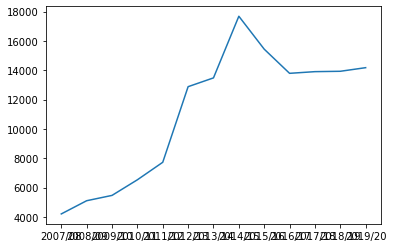

In [214]:
plt.plot(year, ug)

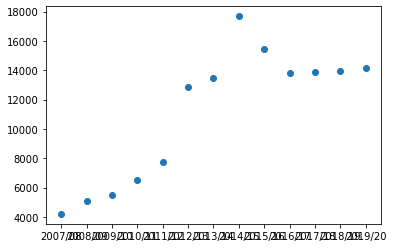

In [223]:
plt.plot(year, ug, 'o')

# Other Markers
`'o'`	Circle	
`'*'`	Star	
`'.'`	Point	
`','`	Pixel	
`'x'`	X	
`'X'`	X (filled)	
`'+'`	Plus	
`'P'`	Plus (filled)	
`'s'`	Square	
`'D'`	Diamond	
`'d'`	Diamond (thin)	
`'p'`	Pentagon	
`'H'`	Hexagon	
`'h'`	Hexagon	
`'v'`	Triangle Down	
`'^'`	Triangle Up	
`'<'`	Triangle Left	
`'>'`	Triangle Right	
`'1'`	Tri Down	
`'2'`	Tri Up	
`'3'`	Tri Left	
`'4'`	Tri Right	
`'|'`	Vline	
`'_'`	Hline

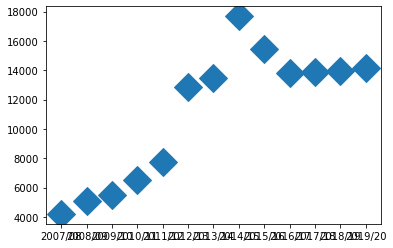

In [225]:
plt.plot(year, ug, 'D')

# Configuring market size
You can use the keyword argument markersize or the shorter version, ms to set the size of the markers:
Example:
```
plt.plot(year, ug, 'D', ms=10)
```

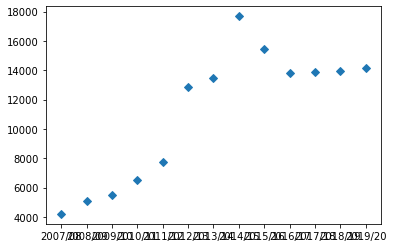

In [227]:
plt.plot(year, ug, 'D', ms=5)
